![logo matplotlib](https://matplotlib.org/_static/logo2_compressed.svg)

<h1><center>INTRODUCCIÓN A MATPLOTLIB</center></h1>

## Contenido
- Instalaciones e inicio
- Elementos básicos y formato
- Gráficas múltiples
- Gráficas de barras y de tarta
- Histogramas
- Gráficas 3D


## Instalaciones (*en Google Colab no son necesarias*)
*Desde una consola del sistema operativo*:
- **Actualización de pip**: <tt>python python -m pip install -U pip</tt>
- **Instalación de Jupyter notebook**: <tt>pip install notebook</tt>
- **Instalación de matplotlib**: <tt>pip install matplotlib</tt>

## Inicio
- Solo para Windows: En el explorador de archivos debemos situarnos en la carpeta en la que queramos trabajar y escribimos en la barra de direcciones: <tt>python -m notebook</tt>
- Para integrar matplotlib en jupyter se usa la *función mágica* **<tt>%matplotlib inline</tt>**
    

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

# para integrar matplotlib en jupyter:
%matplotlib inline

## Elementos básicos de matplotlib

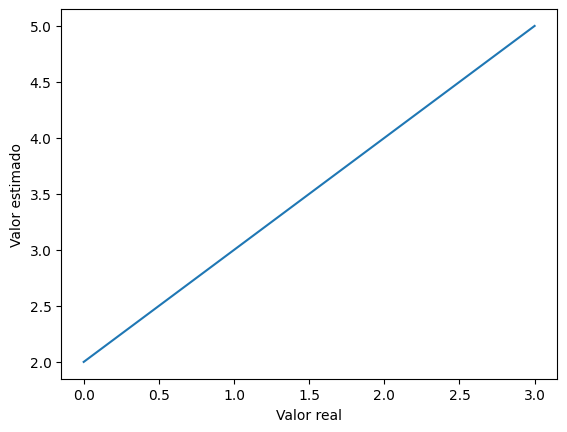

In [10]:
plt.xlabel('Valor real')
plt.ylabel('Valor estimado')
plt.plot([2,3,4,5]);  # datos solo en el eje y
# plt.show()   # innecesario por haber usado %matplotlib
# la última linea con ; para evitar salidas de texto sobre la figura

### Trabajo con dos listas de datos

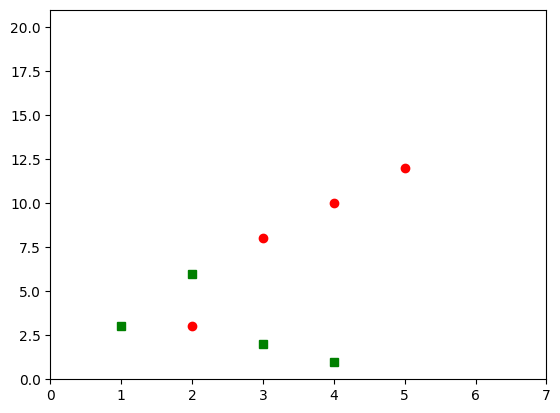

In [11]:
# datos en x e y
plt.plot([2,3,4,5],[3,8,10,12],'ro',[1,2,3,4],[3,6,2,1],'gs'); # formato: r:red, o: circles, g: green, s:square
plt.axis([0,7,0,21]); # indicamos los valores iniciales y finales de cada eje


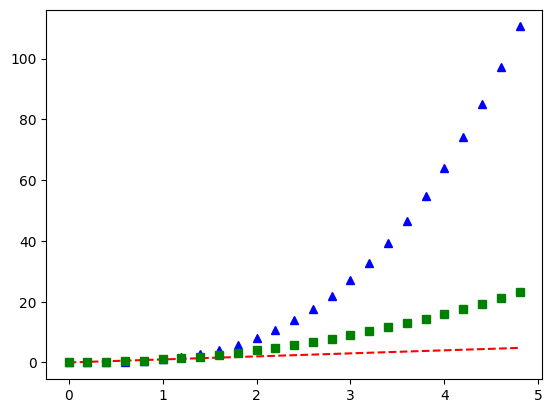

In [12]:
t = np.arange(0,5,0.2)
plt.plot(t,t,'r--', t,t**3,'b^',t,t**2,'gs');

### Gráficas *scatter*
Más lentas que plot y no permiten líneas, solo puntos. Sin embargo, permiten mostrar información en el tamaño y el color de los puntos.

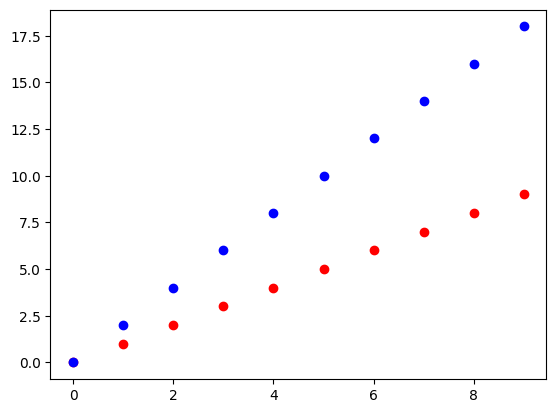

In [13]:
x = np.arange(10)
y = x
z = x*2
plt.scatter(x,y,c='r')
plt.scatter(x,z,c='b');

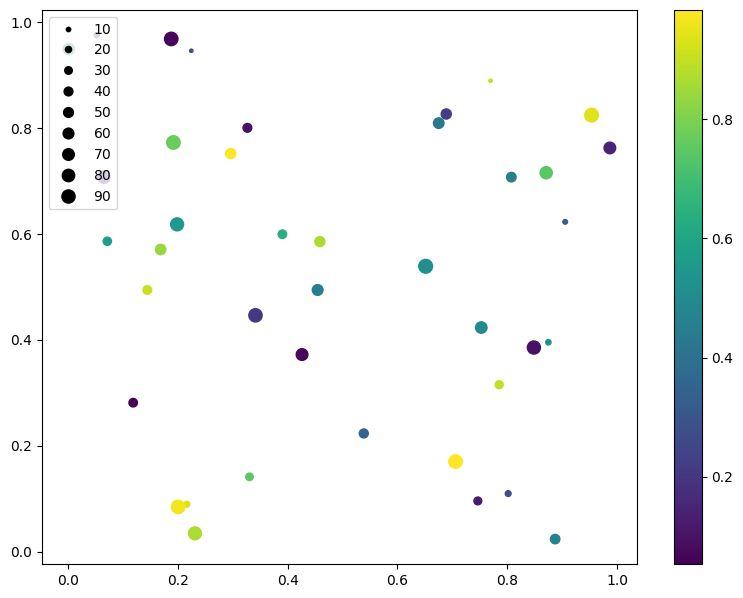

In [14]:
x, y, color, tam = np.random.rand(4, 40) # coordenadas (x,y), color y tamaño : 4 listas de valores en [0,1)
tam = tam * 100 + 5

fig, ax = plt.subplots(figsize=(9.6,7.2))
sc = ax.scatter(x, y, s=tam, c=color) # para usar colores diferentes antes añadimos arg: cmap="RdYlBu"
fig.colorbar(sc)  # muestra la barra de color vertical de la derecha

ax.legend(*sc.legend_elements("sizes"), loc="upper left");

### Más argumentos de formato
- **linewidth**: ancho de línea
- **alpha**: nivel de transparencia
- **color**
- **dashes**: formato de las líneas discontinuas (trazos-espacios)
- **linesytle**: estilo de la línea
- **marker**, **markeredgecolor**, **markeredgewidth**, **markersize**: marcadores de puntos y su formato (color, ancho y tamaño)
- **rejillas** (grids)

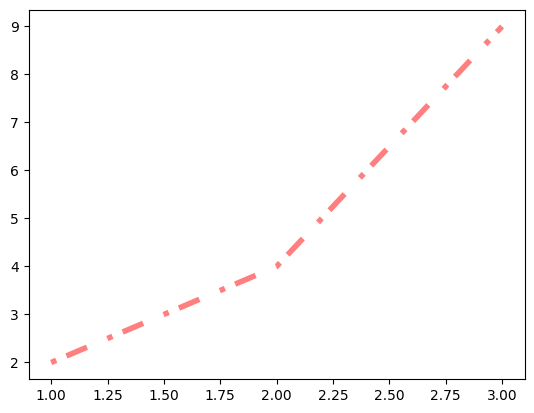

In [17]:
plt.plot([1,2,3],[2,4,9], linewidth=4.0, alpha=0.5, color='red', dashes=[1,2,4,4]);

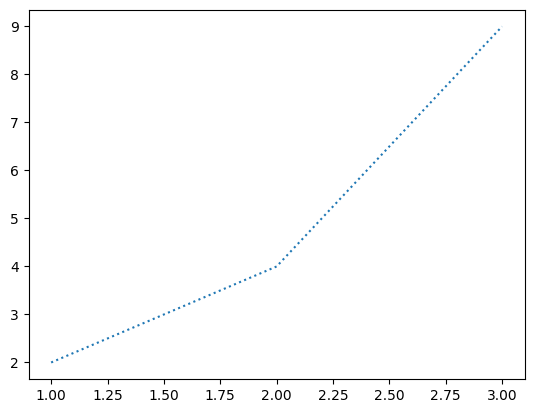

In [18]:
plt.plot([1,2,3],[2,4,9], linestyle=':');

#### Rejilla (grid)


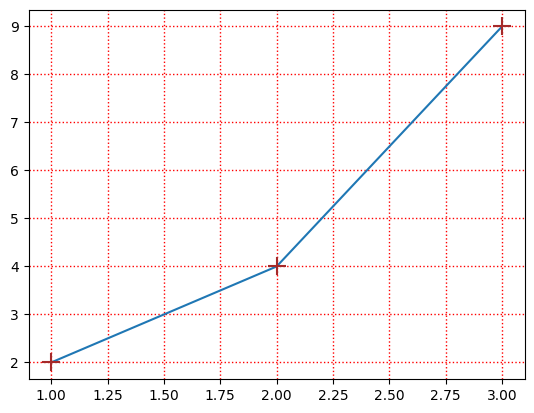

In [19]:
plt.grid(color='r', linestyle=':', linewidth=1) # características de la rejilla
plt.plot([1,2,3],[2,4,9], marker='+', markeredgecolor='brown',
         markeredgewidth=1.5, markersize=13.0);
plt.show()

### zorder
Posición vertical que determina qué gráfica se ve en caso de solapamientos (se muestra la de mayor valor en el argumento zorder)

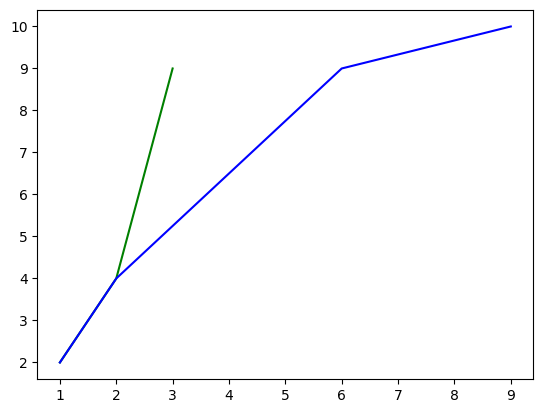

In [20]:
plt.plot([1,2,3],[2,4,9],     zorder=1, color='green')
plt.plot([1,2,6,9],[2,4,9,10],zorder=2, color='blue'); # será la que se vea si hay solapamiento

## Gráficas múltiples (multiplots)

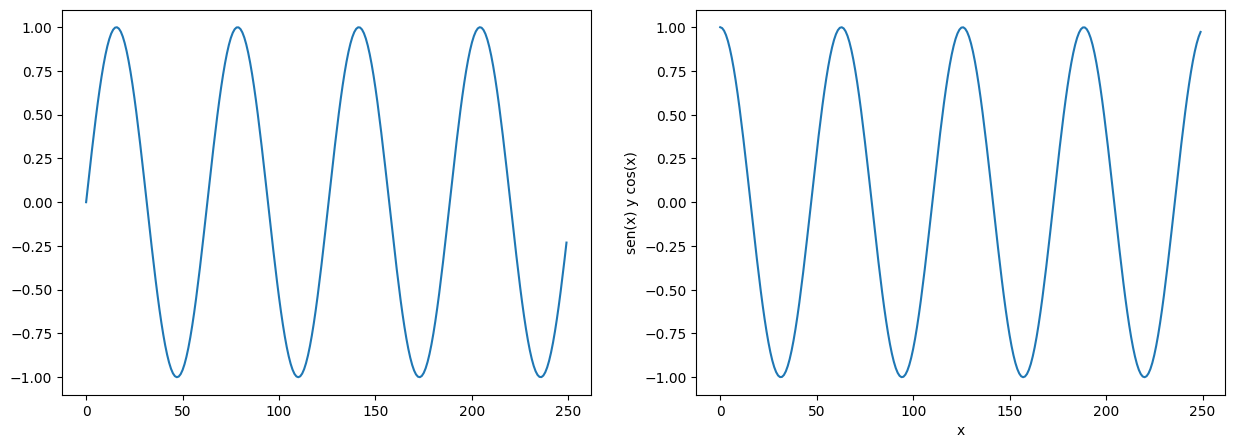

In [21]:
x = np.arange(0,25,0.1)
fig, ejes = plt.subplots(1,2,figsize=(15,5)) # primer arg: número de filas, 2º: num cols.
plt.ylabel('sen(x) y cos(x)')
plt.xlabel('x')
ejes[0].plot(np.sin(x))
ejes[1].plot(np.cos(x));

### Gráficas anidadas

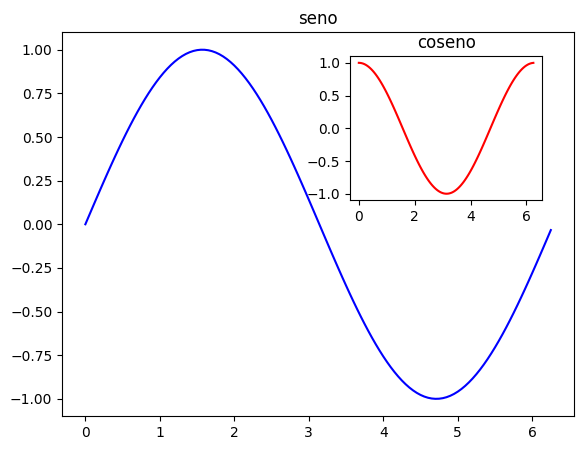

In [22]:
x = np.arange(0, math.pi*2, 0.05)
y = np.sin(x)
fig = plt.figure()
ejes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # distancia a la esquina inf. izq, ancho y alto (en tanto por 1)
ejes2 = fig.add_axes([0.55, 0.55, 0.3, 0.3])
# gráfica 1
ejes1.plot(x,y,'b')
ejes1.set_title('seno')
# gráfica 2
ejes2.plot(x,np.cos(x),'r')
ejes2.set_title('coseno');

### matrices de gráficos

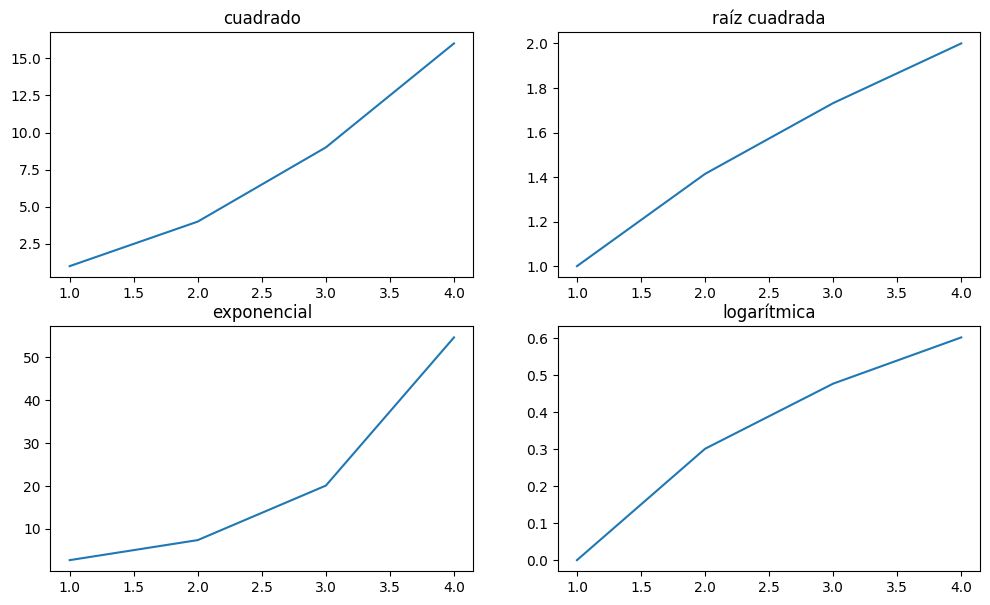

In [23]:
x = np.arange(1,5)
fig, a = plt.subplots(2,2,figsize=(12,7))
a[0][0].plot(x,x**2)
a[0][0].set_title('cuadrado')
a[0][1].plot(x,np.sqrt(x))
a[0][1].set_title('raíz cuadrada')
a[1][0].plot(x,np.exp(x))
a[1][0].set_title('exponencial')
a[1][1].plot(x,np.log10(x))
a[1][1].set_title('logarítmica');

### colspan y rowspan

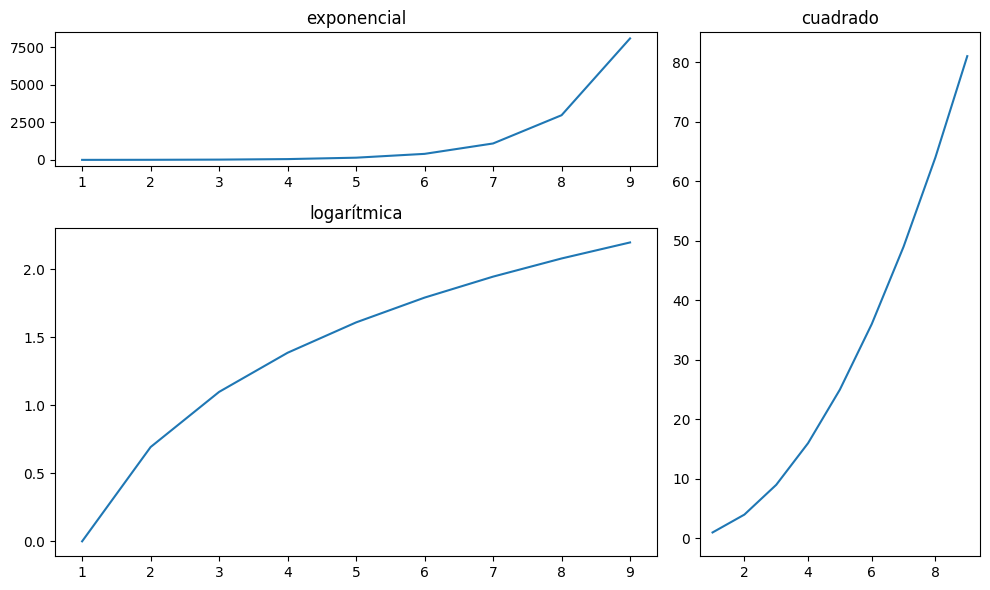

In [24]:
x = np.arange(1,10)

plt.figure(figsize=(10,6))
a1=plt.subplot2grid((3,3),(0,0),colspan=2) # tamaño de grid total (nº filas, nº cols), ubicación (fila,col)
a2=plt.subplot2grid((3,3),(0,2),rowspan=3)
a3=plt.subplot2grid((3,3),(1,0),colspan=2,rowspan=2)

a1.plot(x, np.exp(x))
a1.set_title('exponencial')
a2.plot(x, x**2)
a2.set_title('cuadrado')
a3.plot(x, np.log(x))
a3.set_title('logarítmica')
plt.tight_layout();

## Gráficas de barras

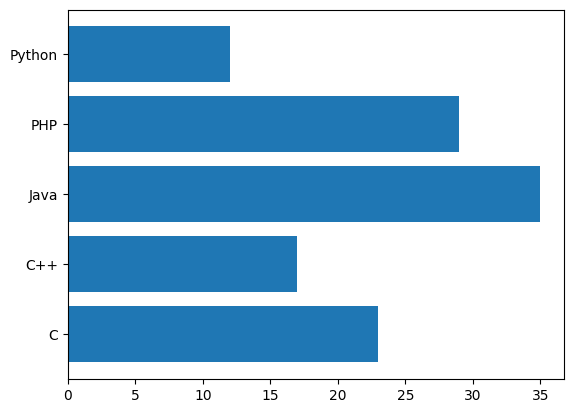

In [25]:
lenguajes = ['C','C++','Java', 'PHP', 'Python']
estudiantes = [23, 17, 35, 29, 12]
plt.barh(lenguajes, estudiantes); # barras verticales: plt.bar()

### Barras paralelas

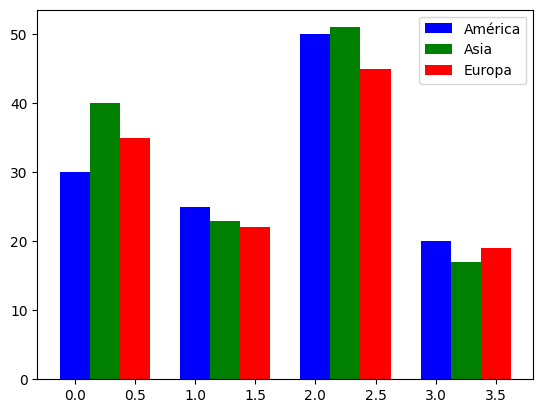

In [26]:
datos = [[30, 25, 50, 20],[40, 23, 51, 17],[35, 22, 45, 19]]
x = np.arange(4)
plt.bar(x,      datos[0], color='b', width=0.25) # width: ancho de las barras
plt.bar(x+0.25, datos[1], color='g', width=0.25)
plt.bar(x+0.50, datos[2], color='r', width=0.25)
plt.legend(labels=['América','Asia','Europa']);


### Barras apiladas

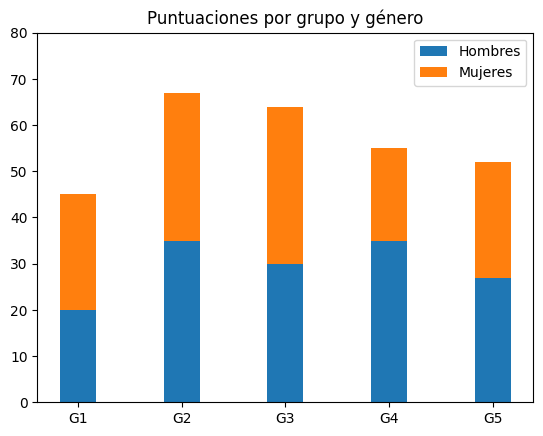

In [27]:
N = 5
promH = (20, 35, 30, 35, 27)
promM = (25, 32, 34, 20, 25)
ind = np.arange(N)
ancho = 0.35
p1 = plt.bar(ind,promH,ancho)
p2 = plt.bar(ind,promM,ancho,bottom=promH)
plt.title('Puntuaciones por grupo y género')
plt.xticks(ind,('G1','G2','G3','G4','G5'))
plt.yticks(np.arange(0,81,10))
plt.legend((p1[0],p2[0]),('Hombres','Mujeres'));

## Gráficas de tarta

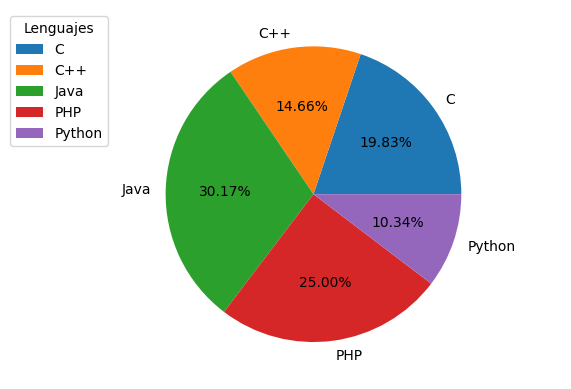

In [28]:
lenguajes = ['C','C++','Java', 'PHP', 'Python']
estudiantes = [23, 17, 35, 29, 12]
plt.axis('equal')
plt.pie(estudiantes, labels=lenguajes, autopct='%1.2f%%')
plt.legend(title='Lenguajes', bbox_to_anchor=(0.1,1));
# bbox_to_anchor: ubicación de la esquina sup dcha de la leyenda
# con respecto al origen de coordenadas de la gráfica (en tanto por uno)

## Histogramas

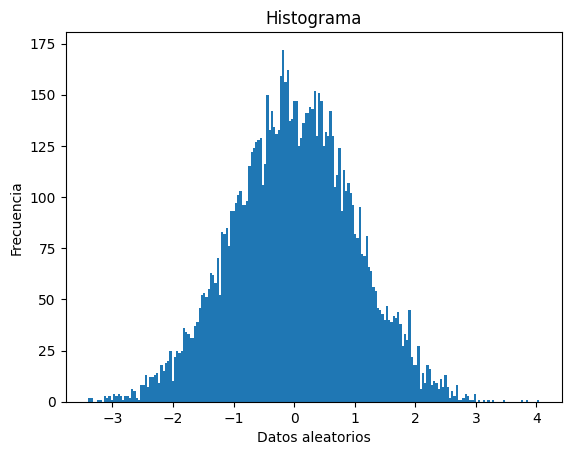

In [29]:
x = np.random.randn(10000)
plt.title('Histograma')
plt.xlabel('Datos aleatorios')
plt.ylabel('Frecuencia')
plt.hist(x,200); # segundo argumento: número de bins

## Graficas 3D

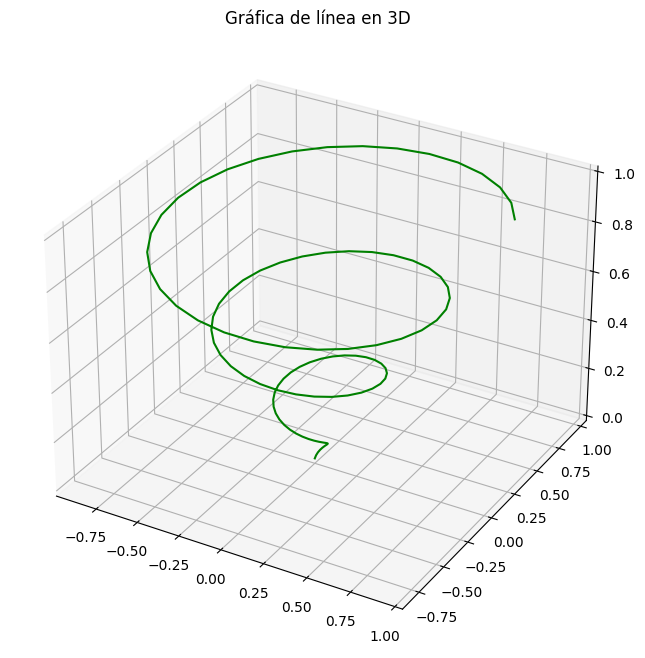

In [30]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (8,8))
f = plt.axes(projection='3d')
z = np.linspace(0,1,100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)
f.plot3D(x,y,z, 'green')
f.set_title('Gráfica de línea en 3D');

## Guardar gráficas en fichero

#### Montar GDrive para acceder a sus carpetas y definir el directorio de guardado

In [31]:
# Versión para Google Colab
from google.colab import drive  # montar Google Drive
drive.mount('/content/gdrive')
DIRECTORIO = '/content/gdrive/MyDrive/Colab Notebooks/CursoDL/temp/' #  directorio de trabajo

# Versión para Windows
# DIRECTORIO = 'c:/temp/'

Mounted at /content/gdrive


#### Guardado de la gráfica

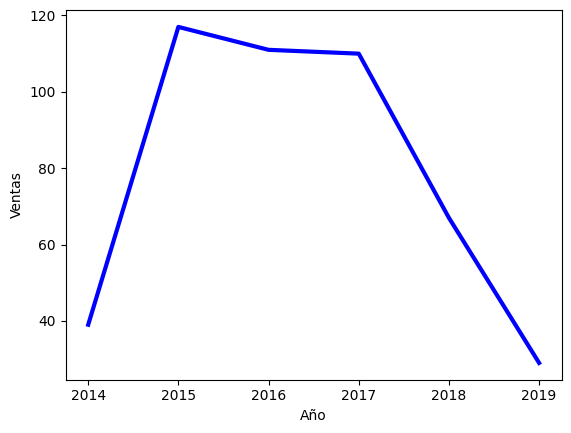

In [34]:
año = [2014, 2015, 2016, 2017, 2018, 2019]
ventas = [39, 117, 111, 110, 67, 29]

plt.plot(año, ventas, color="blue", linewidth=3)
plt.xlabel('Año')
plt.ylabel('Ventas')

plt.savefig(DIRECTORIO + 'figura.pdf')
plt.savefig(DIRECTORIO + 'figura.svg')
plt.savefig(DIRECTORIO + 'figura.png', dpi=300, transparent=True)
plt.savefig(DIRECTORIO + 'figura.jpg', dpi=300)
